# Minimal Surfaces, CMC Surfaces et plus

### Formulas were taken from a variety of books and sites and most can be found in basic books on differential geometry. 

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
%matplotlib inline
from pylab import *
from matplotlib.cbook import get_sample_data
from matplotlib._png import read_png
from scipy import integrate
from scipy.integrate import quad



In [2]:
#Creating the colour map.
#More colour maps can be found here: http://matplotlib.org/users/colormaps.html

my_cmap = plt.cm.get_cmap('gray')

## Enepper's Surface
### This surface is a beautiful minimal surface introduced by Alfred Enneper in 1864

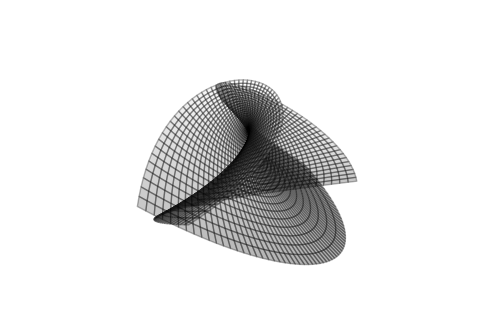

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')

v, u = np.mgrid[-5:5:62j, - np.pi:np.pi:62j]
x = u - (u**3)/3 + u*(v**2)
y = v - (v**3)/3 + v*(u**2)
z = (u**2) - (v**2)
ax.grid(False)
plt.axis('off')
ax.plot_surface(x, y, z, cmap=my_cmap, rstride = 1, cstride = 1,alpha=0.3)
ax.view_init(elev = 25.0, azim=229.0)


#fig.savefig('Enepper.png')



## Torus
### It has zero Gaussian curvature everywhere and is a Surface of Revolution

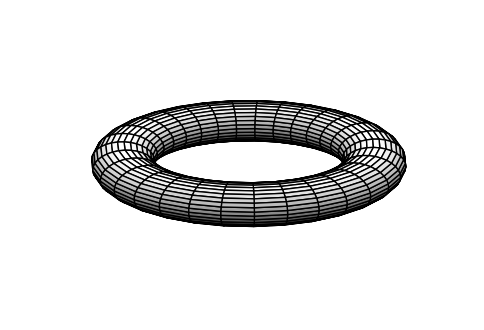

In [4]:
angle = np.linspace(0, 2 * np.pi, 32)
theta, phi = np.meshgrid(angle, angle)
r, R = .25, 1.
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)
# Display the mesh
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.grid(False)
plt.axis('off')
ax.plot_surface(X, Y, Z,cmap=my_cmap, rstride = 1, cstride = 1)

#fig.savefig('torus.png')


## A surface with its tangent plane

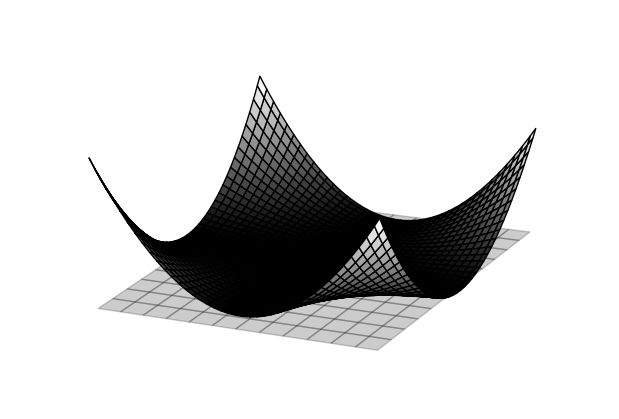

In [4]:
def fun(x, y):
    return (x**2) * (y**2)
fig=plt.figure()
ax = Axes3D(fig)


x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.grid(False)
plt.axis('off')
ax.plot_surface(X, Y, Z,cmap=my_cmap, cstride = 3, rstride=3)

def fun_tp(x, y):
    return (2*x) + (2*y) - 3
zs = np.array([fun_tp(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z,color = 'black',alpha=0.2)
#plt.savefig('surface+tp.png')
 


## Scherk Surface
### The Scherk Surface is an example of a minimal surface
#### The following code depicts part of a Scherk surface

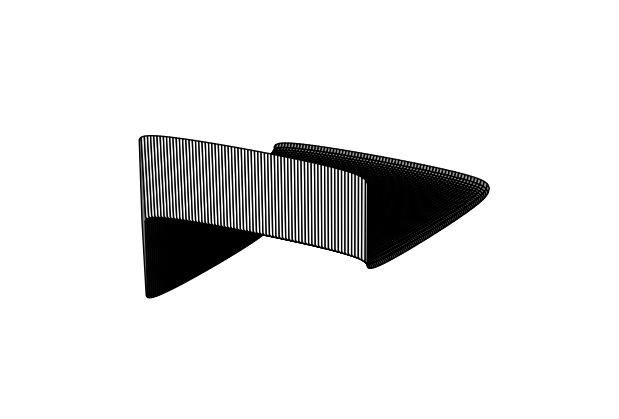

In [5]:
def fun(x, y):
    return np.log((np.cos(x)) / (np.cos(y)))
fig=plt.figure()
ax = Axes3D(fig)


x = y = np.arange(- (np.pi / 2), (np.pi / 2), 0.015)

X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.grid(False)
plt.axis('off')
ax.plot_surface(X, Y, Z, cmap = my_cmap, cstride = 3, rstride = 3)
#ax.view_init(azim=60.0)
#plt.savefig('Scherk1.png')

## Unduloid
### The Unduloid is a CMC (Constant Mean Curvature Surface) with H > 0
#### By Nicoguaro (Own work) [CC BY 4.0 (http://creativecommons.org/licenses/by/4.0)], via Wikimedia Commons


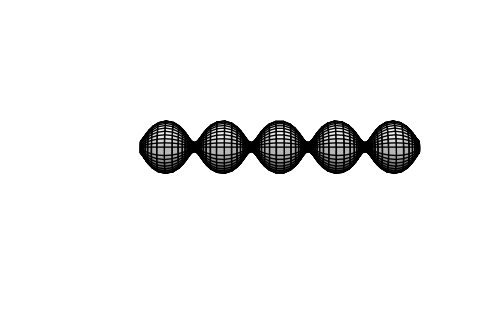

In [6]:

angle = np.linspace(-2*np.pi, 2 * np.pi, 40)
u = np.linspace(-15, 15, 100)
v = np.linspace(-2*np.pi, 2*np.pi, 40)
a = 1.7
b = 1.2


def integrand(alpha,a,b):
    return np.sqrt((a**2) * (np.sin(alpha)) ** 2 + (b**2) * (np.cos(alpha)) ** 2)

X_int = np.array([quad(integrand,0,i,args=(a,b))[0] for i in u])


X = np.outer((X_int + (np.sqrt(a**2 - b**2) * np.sin(u) * (np.sqrt(a**2 - b**2) * np.cos(u) + a)) / np.sqrt((a * np.sin(u))**2 + (b * np.cos(u))**2)),np.ones_like(v))
Y = np.outer(( (np.sqrt(a**2 - b**2) * np.cos(u) + a) / np.sqrt((a * np.sin(u))**2 + (b * np.cos(u))**2) ), (b  * np.cos(v)))
Z = np.outer(( (np.sqrt(a**2 - b**2) * np.cos(u) + a) / np.sqrt((a * np.sin(u))**2 + (b * np.cos(u))**2) ) , (b  * np.sin(v)))


fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.view_init(azim=90, elev=30)
ax.set_xlim([-15, 25])
ax.set_ylim([-5, 10])
ax.set_zlim([-10, 10])
ax.grid(False)
plt.axis('off')
ax.plot_surface(X, Y, Z,cmap=my_cmap, rstride = 1, cstride = 1)
#fig.savefig('undaloid.png')


## Constructing a Double Bubble by Intersecting Spheres

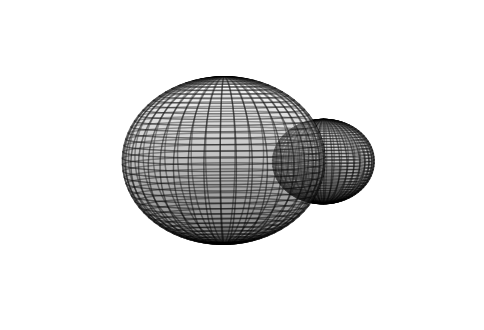

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')

u, v = np.mgrid[0:2*np.pi:42j, 0:np.pi:42j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.grid(False)
plt.axis('off')
ax.plot_surface(x, y, z, cmap=my_cmap, rstride = 1, cstride = 1,alpha=0.3)

x2 = -2 + 2*np.cos(u)*np.sin(v)
y2 = 2*np.sin(u)*np.sin(v)
z2 = 2*np.cos(v)
ax.plot_surface(x2, y2, z2, cmap=my_cmap, rstride = 1, cstride = 1, alpha=0.3)

ax.view_init(elev = 5.0, azim=280.0)
#fig.savefig('Sphere-sphere.png')



## Helicoid
### A minimal surface. It can be transformed into a catenoid.

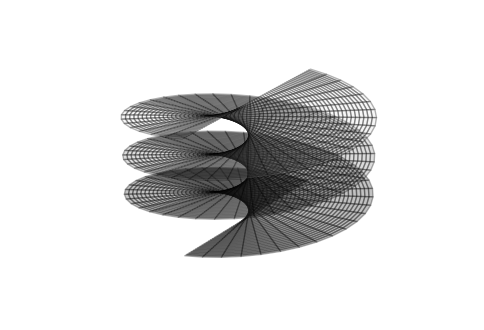

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
v, u = np.mgrid[-1:1:62j, - np.pi:np.pi:62j]
x = v*np.cos(1.5*u)
y = v*np.sin(1.5*u)
z = u
ax.grid(False)
plt.axis('off')
ax.plot_surface(x, y, z, cmap=my_cmap, rstride = 1, cstride = 1,alpha=0.3)
#ax.view_init(elev = 25.0, azim=229.0)


#fig.savefig('Helicoid.png')



## Catenoid
### A catenoid is a minmal surface. It can be bent into a portion of a helicoid.

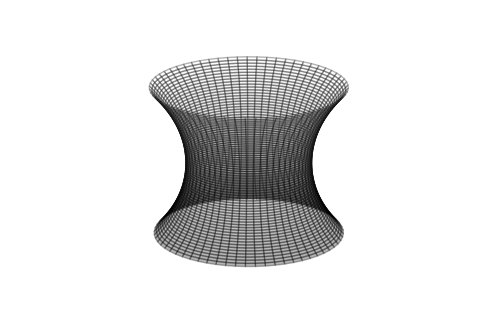

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
v, u = np.mgrid[-1:1:62j, - np.pi:np.pi:62j]
c = 1
x = c * np.cosh(v) * np.cos(u)
y = c * np.cosh(v) * np.sin(u)
z = v
ax.grid(False)
plt.axis('off')
ax.plot_surface(x, y, z, cmap=my_cmap, rstride = 1, cstride = 1,alpha=0.3)
#ax.view_init(elev = 25.0, azim=229.0)


#fig.savefig('Catenoid.png')



## Nodoid
### Nodoids are CMC Surfaces. 

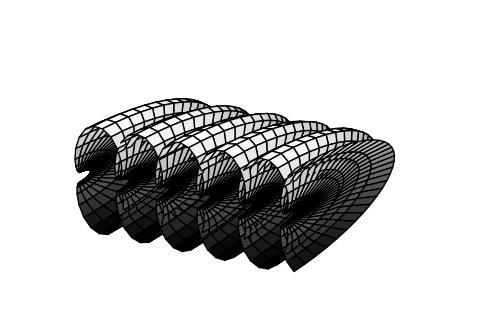

In [10]:
angle = np.linspace(0, 2 * np.pi, 30)
u = np.linspace(-15, 20, 100)
v = np.linspace(-0.5*np.pi, 0.5*np.pi, 30)
a = 1
b_ = 1.5
b = a**2 / b_**2


def integrand(a,b):
    return ((np.sin(a)) ** 2 ) / np.sqrt((np.sin(a) ** 2 ) + b)

X_int = np.array([quad(integrand,0,i,args=(b))[0] for i in u])


X = np.outer(a*( X_int + 1 - np.cos(u)),np.ones_like(v))
Y = np.outer(a*(np.sqrt((np.sin(u) ** 2)+ b) + np.sin(u) ),np.cos(v))
Z = np.outer(a*(np.sqrt((np.sin(u) ** 2)+ b) + np.sin(u) ),np.sin(v))


fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.grid(False)
plt.axis('off')
ax.plot_surface(X, Y, Z,cmap=my_cmap, rstride = 1, cstride = 1)
#ax.view_init(elev = 5.0, azim=239.0)

#fig.savefig('nodoid.png')
